---------------------------------------------------

# -----------------PROYECTO ML FIN DE BOOTCAMP---------------------
## -------------------------------LIMPIEZA DE DATOS----------------------------------

---------------------------------------------------

---------------------------------------------------

In [32]:
import warnings
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [33]:
from utils.funciones import data_report
from utils.funciones import verificador_unidades
from utils.funciones import apply_onehot_encoder

### LEEMOS EL ARCHIVO

In [34]:
ruta = '../data/raw/train.csv'
df = pd.read_csv(ruta, index_col= False)

### EXPLORACION DE DATOS

In [35]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [36]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
5846,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


---------------------
### Descripcion Variables:
1. Unnamed: 0:____Un índice sin nombre.
2. Name:____Nombre del vehículo.
3. Location:____Ubicación.
4. Year:____Año de fabricación.
5. Kilometers_Driven:____Kilómetros recorridos.
6. Fuel_Type:____Tipo de combustible.
7. Transmission:____Tipo de transmisión.
8. Owner_Type:____Tipo de propietario.
9. Mileage:____Consumo de combustible en millas por galón (posiblemente).
10. Engine:____Tamaño del motor.
11. Power:____Potencia del motor.
12. Seats:____Número de asientos.
13. New_Price:____Precio nuevo del vehículo.
14. Price:____Precio del vehículo.
--------------------

In [37]:
#df.info()

---------------------
### Observacion:
 
1. El numero total de variables: 13
2. Variables numericas: 4
3. Variables categoricas: 9
--------------------

In [38]:
df.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,5847.000000,5847,5847,5847.000000,5.847000e+03,5847,5847,5847,5845,5811,5811,5809.000000,815,5847.000000
unique,NaN,1804,11,NaN,NaN,3,2,4,419,140,361,NaN,534,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,762,NaN,NaN,3161,4135,4811,172,602,235,NaN,6,NaN
mean,3013.181461,NaN,NaN,2013.448435,5.841013e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.286452,NaN,9.653742
std,1736.398890,NaN,NaN,3.194949,9.237971e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.806668,NaN,11.275966
min,1.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.440000
25%,1509.500000,NaN,NaN,2012.000000,3.346750e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.550000
50%,3015.000000,NaN,NaN,2014.000000,5.257600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.750000
75%,4517.500000,NaN,NaN,2016.000000,7.249050e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,10.250000


In [39]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

In [40]:
data_report(df=df)

COL_N,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
DATA_TYPE,int64,object,object,int64,int64,object,object,object,object,object,object,float64,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.62,0.62,0.65,86.06,0.0
UNIQUE_VALUES,5847,1804,11,22,3019,3,2,4,419,140,361,8,534,1366
CARDIN (%),100.0,30.85,0.19,0.38,51.63,0.05,0.03,0.07,7.17,2.39,6.17,0.14,9.13,23.36


---------------------
### Observacion:
 
1. La cardinalidad de la colomna 'Unnamed: 0' es del 100%
2. Existen 5 variables con missings, destaca la varianble 'New_Price' el 86,06%
3. Variables 'Mileage', 'Engine', 'Power' tienen unidades, podriamos quitarlas.
4. Variable 'Price' la convertiriamos a Euros.
--------------------

In [41]:
#Eliminamos variable con cardinalidad 100%

df = df.drop(columns='Unnamed: 0', axis=1)

In [42]:
# Cpmprobamos si existen registros duplicados
df.duplicated().sum()

0

### Tratamiento de NaNs en las variables 

#### Variable 'New_Price'

Al contener el 86% de NaNs procedemos a aliminarla definitivamente del dataset.

In [43]:
# Variable 'New_Price'
df= df.drop(columns='New_Price', axis=1)

#### Variable 'Mileage', 'Engine', 'Power' y 'Seats'

Estas varibles contienen menos del 1% de NaNs (0.03%, 0.62%, 0.62% y 0.65% respectivamente), por lo que decidimos borrar estos registros del dataset.

In [44]:
# Variables 'Mileage', 'Engine', 'Power' y 'Seats' cada una con menos del 1% de NaNs, por lo que procederemos a elimiar estas filas

df = df.dropna()        


In [45]:
# Evaluamos la funcion info para verificar la no presencia de nulos y ver cuantas filas contiene el dataset despues de las imputaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 0 to 5846
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5807 non-null   object 
 1   Location           5807 non-null   object 
 2   Year               5807 non-null   int64  
 3   Kilometers_Driven  5807 non-null   int64  
 4   Fuel_Type          5807 non-null   object 
 5   Transmission       5807 non-null   object 
 6   Owner_Type         5807 non-null   object 
 7   Mileage            5807 non-null   object 
 8   Engine             5807 non-null   object 
 9   Power              5807 non-null   object 
 10  Seats              5807 non-null   float64
 11  Price              5807 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 589.8+ KB


### Variables categóricas a numéricas

Aquí trataremos variables numéricas con unidades de medida (object), el proceso consiste en saber cuantas unidades de medida tiene cada variable, en caso de tener dos o mas procedemos a convertirla a una sola para poder quitarla del respectivo registro y convertirlo numérico. 

In [46]:
var_categoricas =['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']
var_numericas = ['Year', 'Kilometers_Driven', 'Seats', 'price']

In [47]:
# Revisamos los valores unicos de la variable 'Mileage' 

df['Mileage'].unique()

array(['19.67 kmpl', '13 km/kg', '20.77 kmpl', '15.2 kmpl', '23.08 kmpl',
       '11.36 kmpl', '20.54 kmpl', '22.3 kmpl', '21.56 kmpl', '16.8 kmpl',
       '25.2 kmpl', '12.7 kmpl', '0.0 kmpl', '13.5 kmpl', '25.8 kmpl',
       '28.4 kmpl', '20.45 kmpl', '14.84 kmpl', '22.69 kmpl',
       '23.65 kmpl', '13.53 kmpl', '18.5 kmpl', '14.4 kmpl',
       '16.48 km/kg', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '9.49 km/kg', '18.2 kmpl',
       '13.68 kmpl', '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl',
       '24.52 kmpl', '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl',
       '19.64 kmpl', '16.5

Para las variables 'Mileage', 'Engine' y 'Power' evidenciamos que tienen unidades de medida, en el caso de 'Mileage' tiene hasta dos unidades.
procederemos a verificar cuales son estas para realizar las respectivas conversiones y dejar toda la variable en una misma unidad.

In [48]:
mileage_units = verificador_unidades(df['Mileage'])
print(f'Unidades Mileage: {mileage_units}')

engine_units = verificador_unidades(df['Engine'])
print(f'Unidades Engine: {engine_units}')

power_units = verificador_unidades(df['Power'])
print(f'Unidades Power: {power_units}')



Unidades Mileage: {'kmpl', 'km/kg'}
Unidades Engine: {'CC'}
Unidades Power: {'bhp'}


### Variable 'Mileage'

La conversión de kilómetros por litro (kmpl) a kilómetros por kilogramo (km/kg) implica considerar la densidad del combustible. La relación entre estas dos unidades depende del tipo específico de combustible utilizado, ya que la densidad del combustible afecta la cantidad de masa (en kilogramos) en un volumen dado (en litros).

La fórmula general para la conversión de kmpl a km/kg es la siguiente:

$ km/kg = kmpl/(densidadCombustible en kg/L) $

​La densidad del diésel y de la gasolina (a menudo referida como "petróleo" en algunos lugares) puede variar, si usamos estimaciones generales:

* Densidad del Diésel: La densidad del diésel varía, pero suele estar en el rango de 0.82 a 0.86 kg/L. Promedio = 0.84 kg/L

* Densidad de la Gasolina (Petróleo): La densidad de la gasolina también varía, pero típicamente se encuentra en el rango de 0.72 a 0.78 kg/L. Promedio = 0.75 kg/L


In [49]:
condicion = (df['Mileage'].str.contains('km/kg')) #Requerimos las filas que contengan la unidad de medida km/kg de la variable 'Mileage'

# Promedio de las densidades de cada uno de los combustibles propuestos en el dataset
densidad_Petrol = 0.75
densidad_diesel = 0.84


for index, row in df[condicion].iterrows():
    try:
        
        mileage_valor = float(row['Mileage'].replace(' km/kg', ''))

        # Obtener la densidad correspondiente al tipo de combustible
        if row['Fuel_Type'] == 'Diesel':
            conversion = mileage_valor * densidad_diesel
        elif row['Fuel_Type'] == 'Petrol':
            conversion = mileage_valor * densidad_Petrol
        else:
            # Manejar el caso en el que el tipo de combustible no sea Diesel ni Petrol
            conversion = mileage_valor

        # Actualizar el valor en el DataFrame
        df.at[index, 'Mileage'] = conversion

    except ValueError:
        # Manejar errores si el formato de 'Mileage' no es el esperado
        print(f"Error en la fila {index}: No se pudo convertir 'Mileage'")

In [50]:
for index, row in df.iterrows():
    if type(row['Mileage']) == str and ' kmpl' in row['Mileage']:
        
        df.at[index, 'Mileage'] = row['Mileage'].replace(' kmpl', '')

df['Mileage'] = df['Mileage'].astype(float).round(2)
#df.head()

In [51]:
df['Mileage'].unique()

array([19.67,  9.75, 20.77, 15.2 , 23.08, 11.36, 20.54, 22.3 , 21.56,
       16.8 , 25.2 , 12.7 ,  0.  , 13.5 , 25.8 , 28.4 , 20.45, 14.84,
       22.69, 23.65, 13.53, 18.5 , 14.4 , 13.84, 20.92, 17.5 , 12.8 ,
       19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15, 11.74,
       22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25, 24.4 ,
       16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,  7.97,
       18.2 , 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94, 17.  ,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 21.1 , 24.07, 19.  ,
       20.58, 19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66,
       17.2 , 20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 ,
       16.6 , 22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81,
       15.4 , 25.47,

### Variables 'Engine' y 'Power'

Como las variables 'Engine' y 'Power' tienen una unica unidad, procedemos a eliminarla y a convertir el valor de cada celda a tipo numerico

In [52]:
#Unidades Engine: {'CC'}
#Unidades Power: {'bhp'}

df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float).round(2)
df['Power'] = df['Power'].str.replace(' bhp', '').astype(float).round(2)

In [53]:
df['Engine'].unique()

array([1582., 1199., 1248., 1968., 1461., 2755., 1598., 1462., 1497.,
       2179., 2477., 1498., 2143., 1995., 1984., 1197.,  998., 2494.,
       1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624., 1999.,
       1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796., 2148.,
       1396., 1950., 4806., 1998., 1193., 2982., 1493., 2967., 2993.,
       1196., 1799., 2497., 2354., 1373., 2996., 1591., 2894., 5461.,
        814., 1595.,  936., 1086., 1997., 1896., 1390., 1364., 2199.,
        993.,  999., 1405., 2956., 1794.,  995., 2496., 1599., 2400.,
       1495., 2523.,  793., 4134., 1395., 2953., 1586., 2362., 1496.,
       1368., 1298., 1956., 1299., 3498., 2835., 1150., 3198., 1343.,
       1499., 1186., 1590., 2609., 2499., 2446., 1978., 2360., 2198.,
       4367., 2706., 1422., 2979., 1969., 1489., 2489., 1388., 1172.,
       2495., 1596., 1194., 3200., 1781., 1341., 2773., 3597., 1985.,
       2147., 1047., 2999., 2995., 2997., 1948., 2359., 4395., 2720.,
       1468., 2487.,

In [54]:
df['Power'].unique()

array([126.2 ,  88.7 ,  88.76, 140.8 ,  63.1 , 171.5 , 103.6 ,  74.  ,
       103.25, 116.3 , 187.7 , 115.  , 175.56,  98.6 ,  83.8 , 167.62,
       190.  ,  88.5 , 177.01,  80.  ,  67.1 , 102.  , 108.45, 138.1 ,
       184.  , 179.5 , 103.5 ,  64.  ,  82.  , 254.8 ,  73.9 ,  46.3 ,
        37.5 ,  77.  ,  82.9 , 149.92, 138.03, 112.2 , 163.7 ,  71.  ,
       105.  , 174.33,  75.  , 103.2 ,  53.3 ,  78.9 , 147.6 , 147.8 ,
        68.  , 186.  , 170.  ,  69.  , 140.  ,  78.  , 194.  , 500.  ,
       108.5 ,  86.8 , 187.74, 132.  ,  86.7 ,  73.94, 117.3 , 218.  ,
       168.5 ,  89.84, 110.  ,  90.  ,  82.85,  67.  , 241.4 ,  35.  ,
       270.9 , 126.32,  73.  , 130.  , 100.6 , 150.  ,  75.94, 215.  ,
       107.3 ,  37.48, 120.  , 178.  , 152.  ,  91.1 ,  85.8 , 362.07,
       121.3 , 143.  ,  81.8 , 171.  ,  76.8 , 103.52, 444.  , 362.9 ,
        55.2 ,  67.06, 120.7 , 258.  ,  81.86, 112.  ,  88.73,  57.6 ,
       157.75, 102.5 , 201.1 ,  83.1 ,  68.05, 106.  , 100.  ,  81.83,
      

### Variable 'Price' 

Para convertir de "INR Lakh" a "Euros", recordar que: 1 lank equivale a 100_000 rupias

- 1 Lakh = 10^5 rupias 
- 1€  = 89.96 Rupias Indias (Valores se tienen que actualizar cada vez que se requiera)

Teniendo en cuenta que la variable 'Price' esta dada en lanks, tenemos:

In [55]:
euro = 89.96 #Actualizar valor del Euro a la fecha

df['Price_euro'] = round(df['Price'] * 100000 / euro, 2)
df = df.drop('Price', axis=1)

### Variable 'Owner_Type' 

Reemplazaremos los valores de cada una de sus cuatro categorias por valores numericos del 0 al 3.

In [56]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [57]:
mapeo_owner_type = {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0}

# Aplicar el mapeo a la columna 'Owner_Type'
df['Owner_Type'] = df['Owner_Type'].map(mapeo_owner_type)

### Variable 'Year'

Podemos trabajar este dato de manera diferente, en lugar de tener un año, podriamos tener una edad a tiempo presente. Asi que podemos implementar una nueva columna que nos muestre la edad del vehiculo al año 2024.

In [58]:
# Asignamos a la variable año_actual el año en que se este realizando la prediccion 
año_actual = 2024
df['Edad'] = año_actual - df['Year']

In [59]:
# Como creamos la variable 'Edad' ya no necesitamos la variable 'Year'
df.drop('Year', axis = 1, inplace = True)

### Variable 'Name'

En esta variable utilizaremos una expresion regular para extraer unicamente la marca del vehiculo.

In [60]:
df['Name_General'] = df['Name'].str.extract(r'^(\S+)')

In [61]:
# Eliminamos la verible Name debido a que creamos la variable Name_General
df = df.drop('Name', axis=1)

In [62]:
df['Name_General'].unique()

array(['Hyundai', 'Honda', 'Maruti', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

Evidenciamos que la marca Isuzu está tambien escrita como ISUZU, así que las igualamos.

In [63]:
df['Name_General'] = df['Name_General'].replace('ISUZU', 'Isuzu')

In [64]:
df['Name_General'].unique()

array(['Hyundai', 'Honda', 'Maruti', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 0 to 5846
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5807 non-null   object 
 1   Kilometers_Driven  5807 non-null   int64  
 2   Fuel_Type          5807 non-null   object 
 3   Transmission       5807 non-null   object 
 4   Owner_Type         5807 non-null   int64  
 5   Mileage            5807 non-null   float64
 6   Engine             5807 non-null   float64
 7   Power              5807 non-null   float64
 8   Seats              5807 non-null   float64
 9   Price_euro         5807 non-null   float64
 10  Edad               5807 non-null   int64  
 11  Name_General       5807 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 718.8+ KB


# GUARDAMOS DATOS PROCESADOS EN ARCHIVO

Guardamos los datos con los cambios y la limpieza realizada en un archivo para proceder con el EDA. En este archivo se realizaron algunos cambios que permitirán procesar mejor los datos.

In [66]:
df.to_csv('../data/processed/DatosLimpios.csv', index=False) 

In [67]:
df 

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_euro,Edad,Name_General
0,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,13895.06,9,Hyundai
1,Chennai,46000,Petrol,Manual,3,9.75,1199.0,88.70,5.0,5002.22,13,Honda
2,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6669.63,12,Maruti
3,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,19719.88,11,Audi
4,Jaipur,86999,Diesel,Manual,3,23.08,1461.0,63.10,5.0,3890.62,11,Nissan
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,Delhi,27365,Diesel,Manual,3,28.40,1248.0,74.00,5.0,5280.12,10,Maruti
5843,Jaipur,100000,Diesel,Manual,3,24.40,1120.0,71.00,5.0,4446.42,9,Hyundai
5844,Jaipur,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,3223.65,12,Mahindra
5845,Kolkata,46000,Petrol,Manual,3,18.90,998.0,67.10,5.0,2945.75,11,Maruti


---------------------------------------------------

# ------------------------ FIN LIMPIEZA DATOS----------------------------

---------------------------------------------------

In [27]:
# Dataset con datos de variable objetivo con valores diferentes a cero
df_train = df[df['New_Price'] != 0]
df_train = df_train.reset_index(drop = True)


# Dataset con datos de variable objetivo con valores iguales a cero
df_test = df[df['New_Price'] == 0]
df_test.drop('New_Price', axis=1, inplace=True)
df_test = df_test.reset_index(drop = True)

In [28]:
df_train.to_csv('../data/processed/train.csv', index=False) #Datos que seran utilizados como train
df_test.to_csv('../data/processed/test.csv', index=False) #Datos que seran utilizados como test

In [29]:
df_test

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Edad
0,Hyundai,Pune,41000,Diesel,Manual,3,19.67,1582.0,126.20,5.0,12.50,9
1,Maruti,Chennai,87000,Diesel,Manual,3,20.77,1248.0,88.76,7.0,6.00,12
2,Audi,Coimbatore,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,11
3,Nissan,Jaipur,86999,Diesel,Manual,3,23.08,1461.0,63.10,5.0,3.50,11
4,Volkswagen,Pune,64430,Diesel,Manual,3,20.54,1598.0,103.60,5.0,5.20,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4988,Honda,Coimbatore,70602,Diesel,Manual,3,25.80,1498.0,98.60,5.0,4.83,9
4989,Hyundai,Jaipur,100000,Diesel,Manual,3,24.40,1120.0,71.00,5.0,4.00,9
4990,Mahindra,Jaipur,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,2.90,12
4991,Maruti,Kolkata,46000,Petrol,Manual,3,18.90,998.0,67.10,5.0,2.65,11


In [30]:
df_train

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Edad
0,Honda,Chennai,46000,Petrol,Manual,3,9.75,1199.0,88.70,5.0,8.61,4.50,13
1,Toyota,Mumbai,36000,Diesel,Automatic,3,11.36,2755.0,171.50,8.0,21.00,17.50,8
2,Maruti,Kochi,25692,Petrol,Manual,3,21.56,1462.0,103.25,5.0,10.65,9.95,6
3,Mitsubishi,Delhi,110000,Diesel,Manual,3,13.50,2477.0,175.56,7.0,32.01,15.00,10
4,BMW,Kochi,32982,Diesel,Automatic,3,22.69,1995.0,190.00,5.0,47.87,18.55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Tata,Chennai,10000,Petrol,Manual,3,17.57,1193.0,88.70,5.0,7.77,4.00,8
810,Volkswagen,Mumbai,38000,Petrol,Manual,3,16.09,1598.0,103.50,5.0,11.91,3.25,13
811,Maruti,Pune,37208,Diesel,Manual,3,24.30,1248.0,88.50,5.0,9.93,7.43,8
812,Honda,Delhi,33746,Petrol,Manual,3,18.50,1198.0,86.80,5.0,6.63,3.20,11


In [31]:
print(df_train.shape)
print(df_test.shape)

(814, 13)
(4993, 12)


# SELECCION DE VARIABLES

In [311]:
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df_train[numeric_cols]

In [1]:
numeric_df.corr()

NameError: name 'numeric_df' is not defined

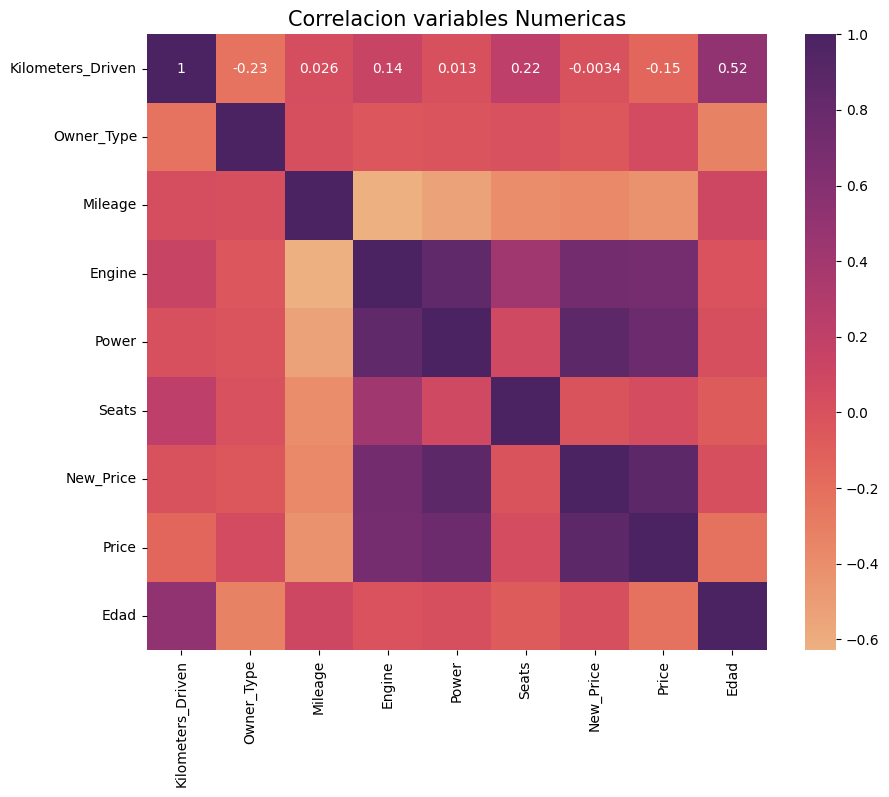

In [312]:

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='flare', annot=True)
plt.title("Correlacion variables Numericas", size=15)
plt.show()

Para la variable a predecir 'New_Price', las variables que mas estan correlacionadas con ella son en su orden 'Price', 'Power' y 'Engine'. De esta manera descartamos de momento las demas variables numericas del dataframe.

In [313]:
df_variables_importantes = df_train[['Name', 'Location', 'Fuel_Type', 'Transmission', 'Price', 'Power', 'Engine', 'New_Price']]

A este dataframe le haremos las respectivas estandarizaciones (OHE, StandardScaler...), aplicaremos los diferentes modelos de prediccion y resolveremos cual es el que mejor predice la variable objetivo.

In [319]:
df_vip = df_variables_importantes

### Variables 'Name', 'Location', 'Fuel_Type', 'Transmission'

De momento nos vamos a arriesgar a realizar un LabelEncoder a la variable 'Name' y OHE a las variables 'Location', 'Fuel_Type', 'Transmission'. Una vez evaluados los modelos y viendo la importancia de las variables en la prediccion, tomaremos decisiones sobre estas.

In [315]:
#Clasificacion de variables para su respectivo tratamiento

le = LabelEncoder()
df_variables_importantes['Name']=le.fit_transform(df_variables_importantes['Name'])

In [316]:
variables_cat = ['Location', 'Fuel_Type', 'Transmission']

df_variables_importantes = apply_onehot_encoder(df_variables_importantes, variables_cat)

In [317]:
df_variables_importantes

,Name,Price,Power,Engine,New_Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,5,4.50,88.70,1199.0,8.61,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,21,17.50,171.50,2755.0,21.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,12,9.95,103.25,1462.0,10.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,15,15.00,175.56,2477.0,32.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,18.55,190.00,1995.0,47.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,20,4.00,88.70,1193.0,7.77,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
810,22,3.25,103.50,1598.0,11.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
811,12,7.43,88.50,1248.0,9.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
812,5,3.20,86.80,1198.0,6.63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


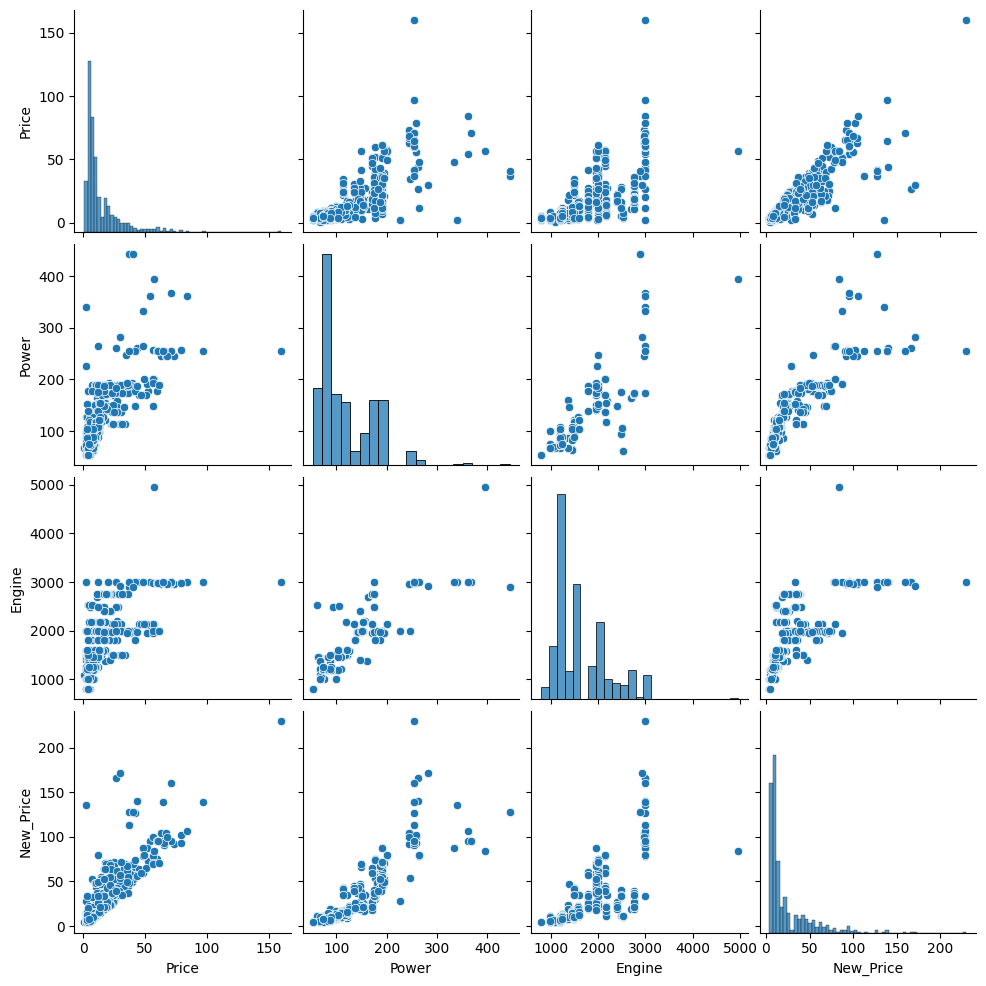

In [318]:
sns.pairplot(df_variables_importantes[['Price', 'Power',  'Engine', 'New_Price']])

# Division de Datos